In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\datasets\Mall_Customers.csv")

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.shape

(200, 5)

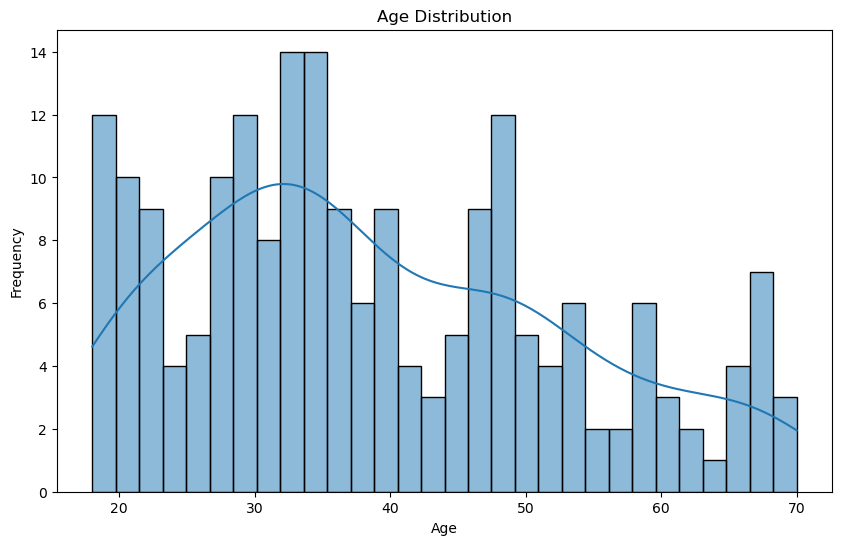

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

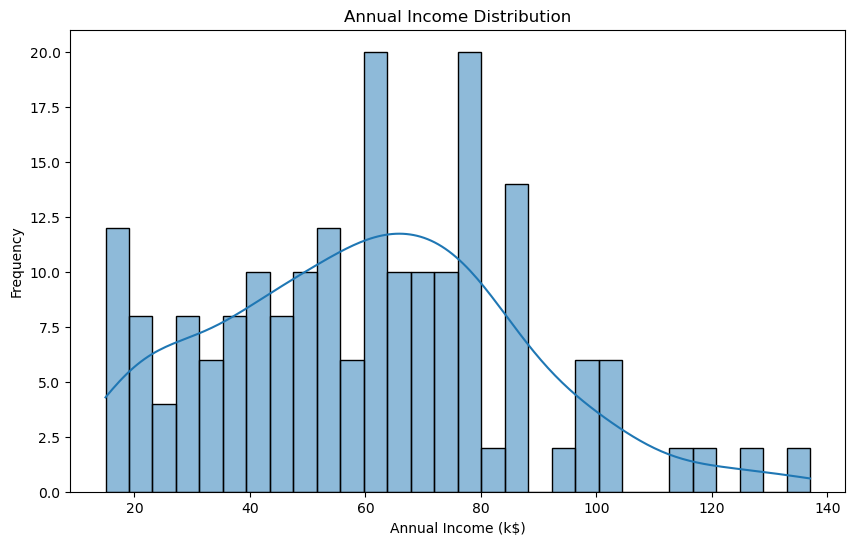

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income (k$)'], kde=True, bins=30)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.show()

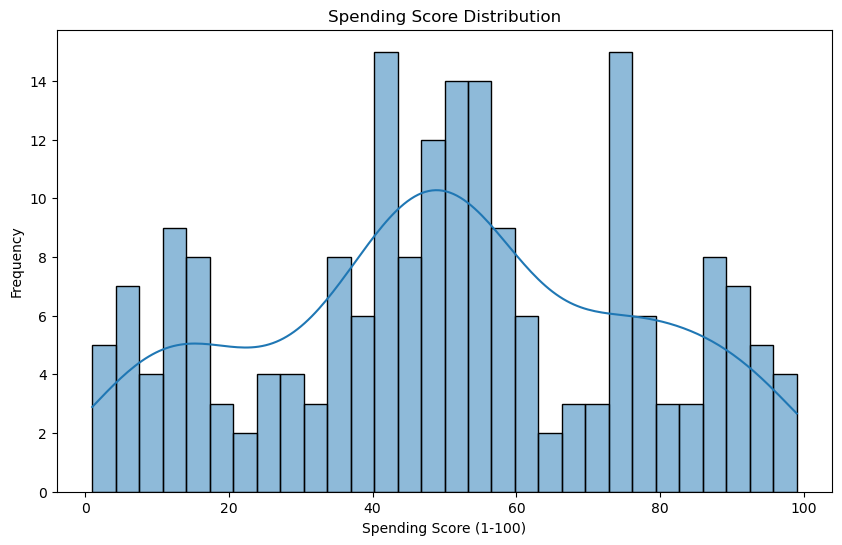

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=30)
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.show()

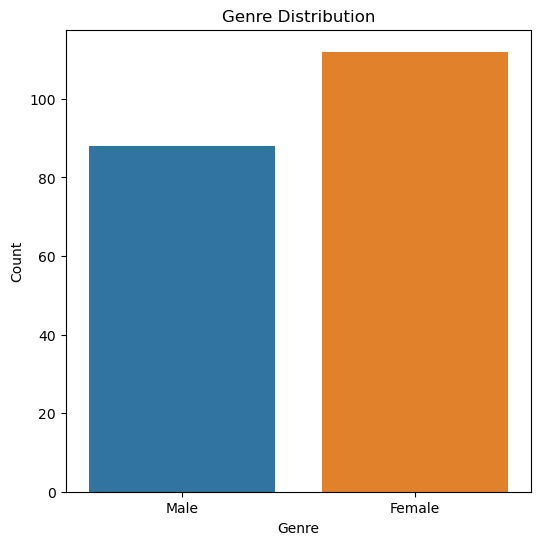

In [11]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Genre', data=df)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

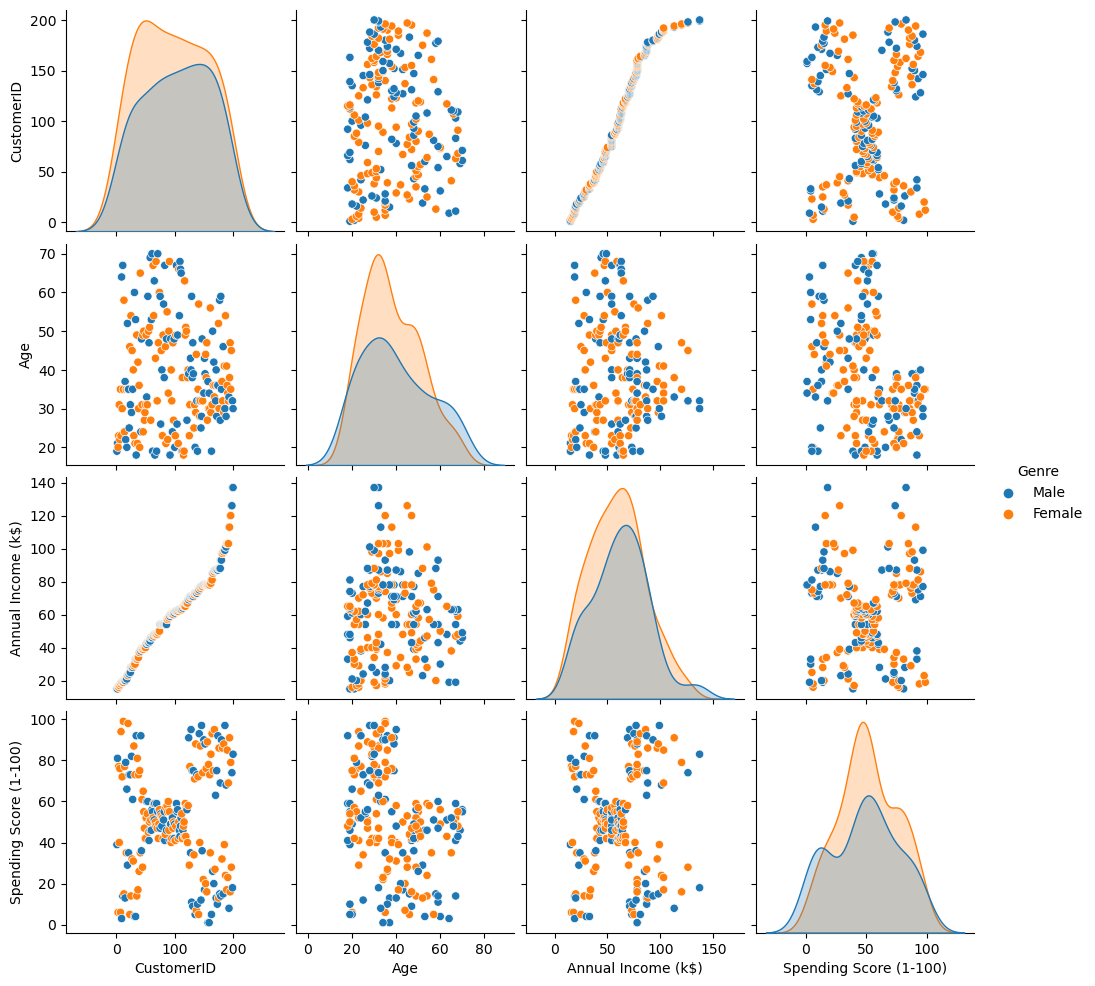

In [43]:
sns.pairplot(df, hue='Genre')
plt.show()

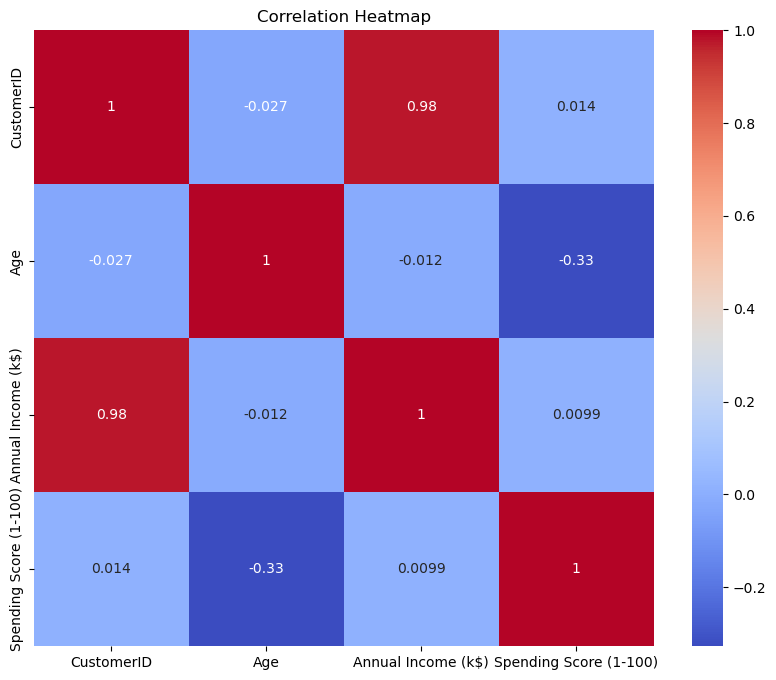

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

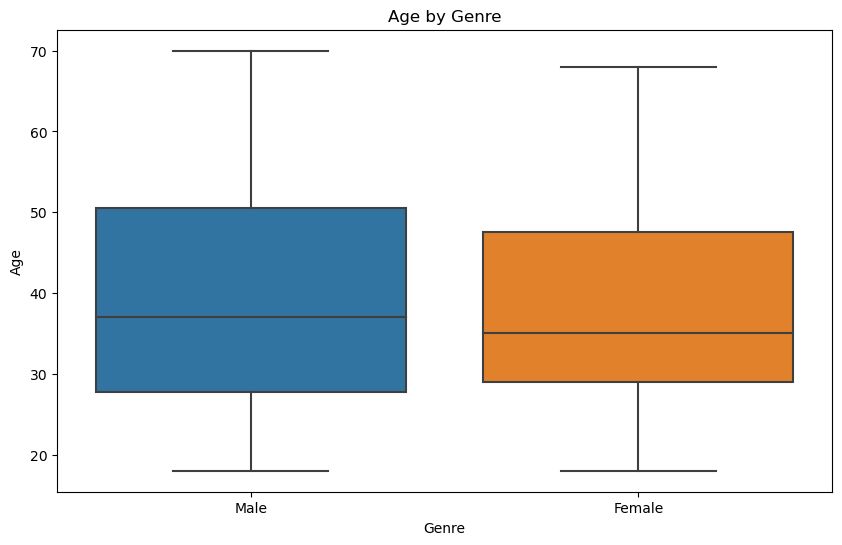

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='Age', data=df)
plt.title('Age by Genre')
plt.show()

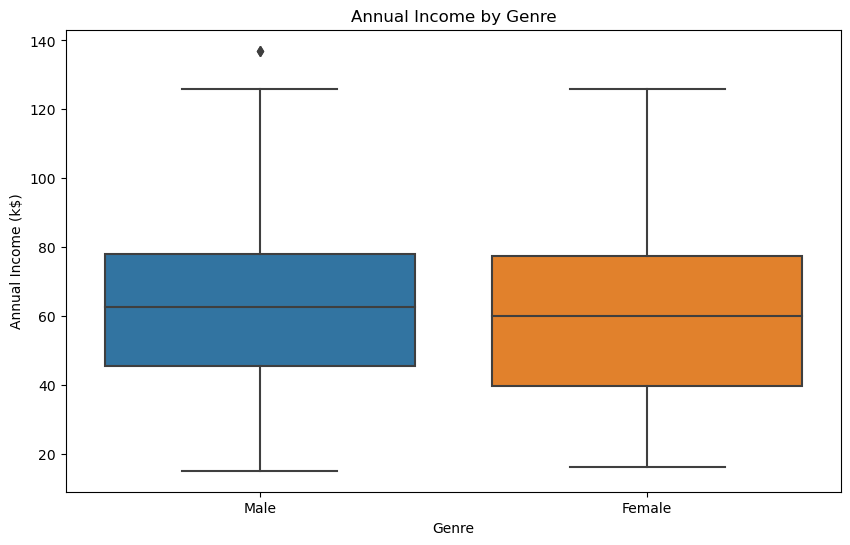

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='Annual Income (k$)', data=df)
plt.title('Annual Income by Genre')
plt.show()

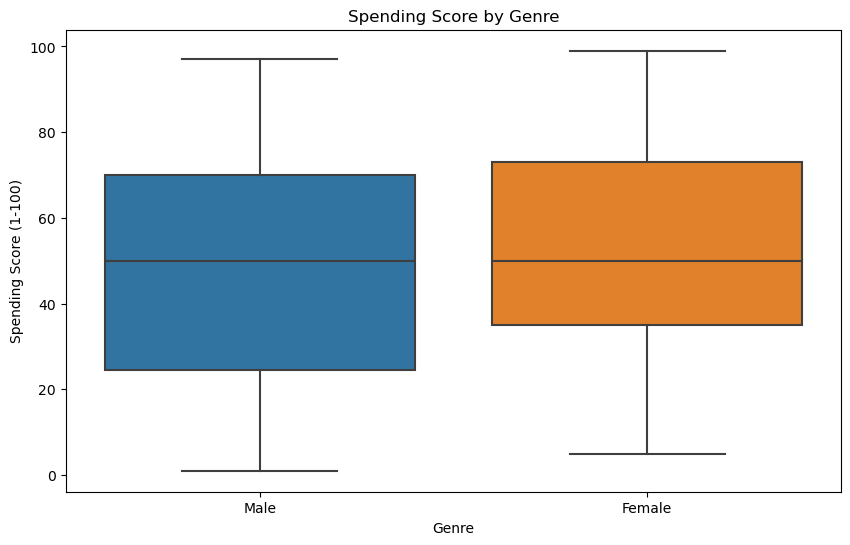

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='Spending Score (1-100)', data=df)
plt.title('Spending Score by Genre')
plt.show()

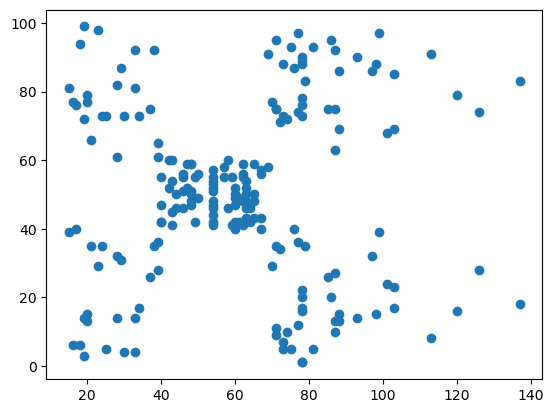

In [17]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

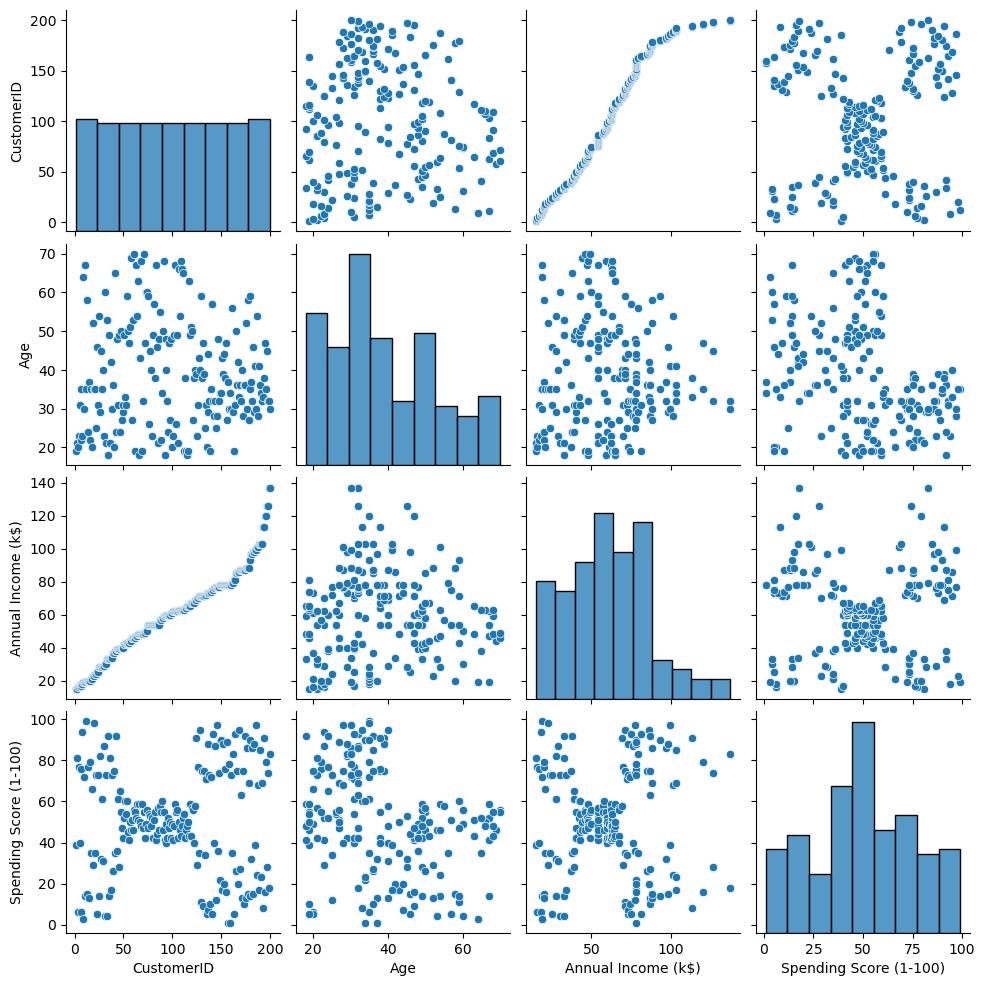

In [18]:
sns.pairplot(df)

In [19]:
X=df.iloc[:,[3,4]].values

In [20]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [21]:
from sklearn.cluster import KMeans
wcss=[]

In [22]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

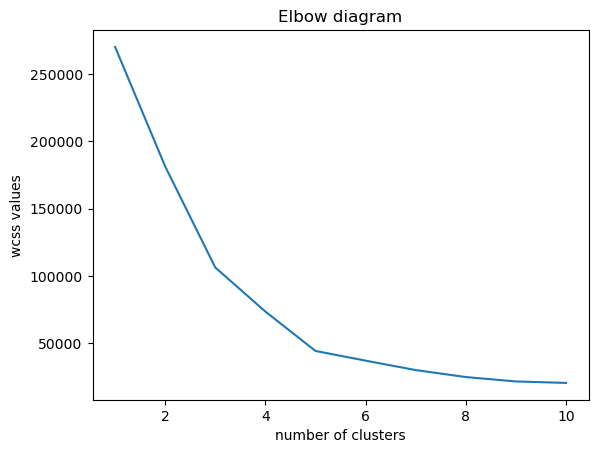

In [23]:
plt.plot(range(1,11),wcss)
plt.title('Elbow diagram')
plt.xlabel('number of clusters')
plt.ylabel('wcss values')
plt.show()

In [24]:
kmeansmodel=KMeans(n_clusters=5,init='k-means++',random_state=0)

In [25]:
y_kmeans=kmeansmodel.fit_predict(X)

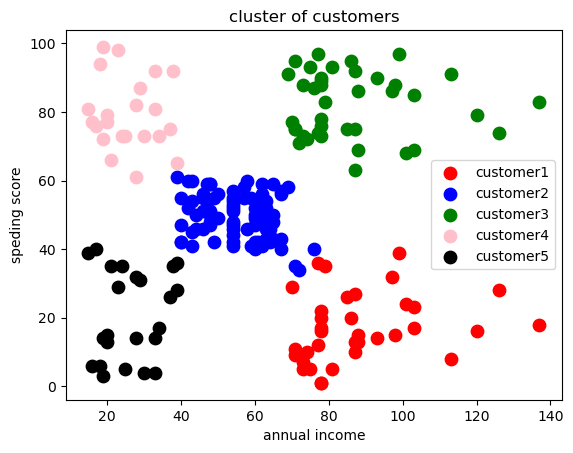

In [26]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=80,c='red',label='customer1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=80,c='blue',label='customer2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=80,c='green',label='customer3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=80,c='pink',label='customer4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=80,c='black',label='customer5')
plt.title('cluster of customers')
plt.xlabel('annual income')
plt.ylabel('speding score')
plt.legend()
plt.show()

# Linear regression model

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
X = df[['Age','Spending Score (1-100)','Annual Income (k$)']]
y = df['CustomerID']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test

,Age,Annual Income (k$),Spending Score (1-100)
95,24,60,52
15,22,20,79
30,60,30,4
158,34,78,1
128,59,71,11
115,19,65,50
69,32,48,47
170,40,87,13
174,52,88,13
45,24,39,65


In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)
y_pred

array([ 99.47897802,  15.88289061,  32.91851932, 135.45498065,
       119.83959769, 110.21072215,  73.59483817, 154.58320964,
       156.15099733,  55.50612857,  73.18944111, 177.62228807,
       152.4984485 ,  86.84334306, 183.8835929 , 159.05859024,
        64.37154537, 135.6009621 ,  84.49452228,  74.5654725 ,
       119.93241065,  16.01397322, 136.1189756 ,  98.37191092,
        74.61095009,  67.92422155,  87.09239227,  71.98926379,
       121.08629267, 124.22658702,  13.1842195 ,  19.27817889,
        62.1553677 ,  86.7701479 , 135.55158327, 102.69555106,
       127.865611  , 127.25489613, 150.31244072,  85.87445491])

In [32]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [33]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2*100}')

Mean Squared Error: 95.62107617704642
R^2 Score: 96.39064960868143


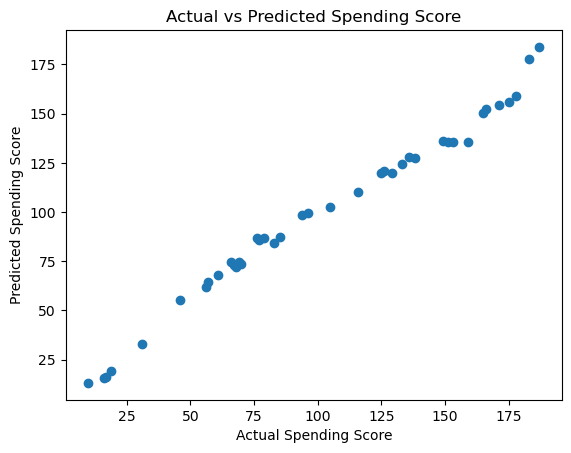

In [34]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Spending Score')
plt.ylabel('Predicted Spending Score')
plt.title('Actual vs Predicted Spending Score')
plt.show()

# Logistic Regresssion model

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [36]:
X = df[['Age','Annual Income (k$)','Spending Score (1-100)']]
y = df['CustomerID']

In [37]:
y_binary = np.where(y > 150, 1, 0)
y_binary

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)
X_test

,Age,Annual Income (k$),Spending Score (1-100)
95,24,60,52
15,22,20,79
30,60,30,4
158,34,78,1
128,59,71,11
115,19,65,50
69,32,48,47
170,40,87,13
174,52,88,13
45,24,39,65


In [39]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [40]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [41]:
accuracy = accuracy_score(y_test, y_pred)

In [42]:
print(f'Accuracy: {accuracy*100}')

Accuracy: 97.5
